# Manipulação na base de dados Iris

https://www.kaggle.com/search?q=iris+in%3Adatasets

In [2]:
import pandas as pd #Manipulação e análise de dados em tabelas (DataFrames), Leitura de arquivos, Criação e manipulação de tabelas, Filtros, agregações, estatísticas descritivas
import matplotlib.pyplot as plt #Criar gráficos e visualizações básicas , É a base sobre a qual outras bibliotecas (como o Seaborn) constroem gráficos.
import seaborn as sns #Criar gráficos estatísticos bonitos e informativos com menos código.

In [73]:
# Tipos de Dados e Estruturas
df = pd.read_csv("C:/Users/Nicoly/Documents/AnáliseET/Aula1-Fundamentos Python/Iris.csv")
print(df.head(7))

# pd.read_excel("arquivo.xlsx")
# pd.read_json("arquivo.json")

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa
5   6            5.4           3.9            1.7           0.4  Iris-setosa
6   7            4.6           3.4            1.4           0.3  Iris-setosa


SepalLengthCm (comprimento da sépala)\
SepalWidthCm (largura da sépala)\
PetalLengthCm (comprimento da pétala)\
PetalWidthCm (largura da pétala)

# Exploratória

In [77]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [79]:
# Verificar valores ausentes
print(df.isnull().sum())

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


In [81]:
# conta o número de valores não nulos 
df.count() 

Id               150
SepalLengthCm    150
SepalWidthCm     150
PetalLengthCm    150
PetalWidthCm     150
Species          150
dtype: int64

In [83]:
# Verificando os valores únicos na variável categórica Species
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

### Filtragem

In [86]:
# Filtragem: flores com pétalas comprimento maiores que 5cm
grandes = df[df['PetalLengthCm']  > 5]
print(grandes.head())

      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
83    84            6.0           2.7            5.1           1.6   
100  101            6.3           3.3            6.0           2.5   
101  102            5.8           2.7            5.1           1.9   
102  103            7.1           3.0            5.9           2.1   
103  104            6.3           2.9            5.6           1.8   

             Species  
83   Iris-versicolor  
100   Iris-virginica  
101   Iris-virginica  
102   Iris-virginica  
103   Iris-virginica  


**Exercício 1: Calcular a média do comprimento da sépala por espécie.**

In [89]:
df[(df['Species'] == 'Iris-virginica') & (df['PetalLengthCm'] > 5)].head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
100,101,6.3,3.3,6.0,2.5,Iris-virginica
101,102,5.8,2.7,5.1,1.9,Iris-virginica
102,103,7.1,3.0,5.9,2.1,Iris-virginica
103,104,6.3,2.9,5.6,1.8,Iris-virginica
104,105,6.5,3.0,5.8,2.2,Iris-virginica


## Agrupamento

In [92]:
# Agrupamento: média por espécie
media_por_especie = df.groupby('Species').mean() ## groupby é um método do objeto df (que é um DataFrame)
print(media_por_especie)

                    Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  \
Species                                                              
Iris-setosa       25.5          5.006         3.418          1.464   
Iris-versicolor   75.5          5.936         2.770          4.260   
Iris-virginica   125.5          6.588         2.974          5.552   

                 PetalWidthCm  
Species                        
Iris-setosa             0.244  
Iris-versicolor         1.326  
Iris-virginica          2.026  


**Exercício 2: Qual é a média, o desvio padrão e o valor máximo do comprimento das pétalas (petal_length) para cada espécie de flor (species)?**

In [95]:
df.groupby('Species')['PetalLengthCm'].agg(['mean','std','max'])

,mean,std,max
Species,,,
Iris-setosa,1.464,0.173511,1.9
Iris-versicolor,4.260,0.469911,5.1
Iris-virginica,5.552,0.551895,6.9


## Figuras

O sns.boxplot do Seaborn cria um boxplot (diagrama de caixa), que é uma representação gráfica para mostrar a distribuição de uma variável numérica.\
sns é o nome/apelido que geralmente atribuímos à biblioteca Seaborn ao importá-la.\
boxplot() é a função que tem dentro da biblioteca seaborn.

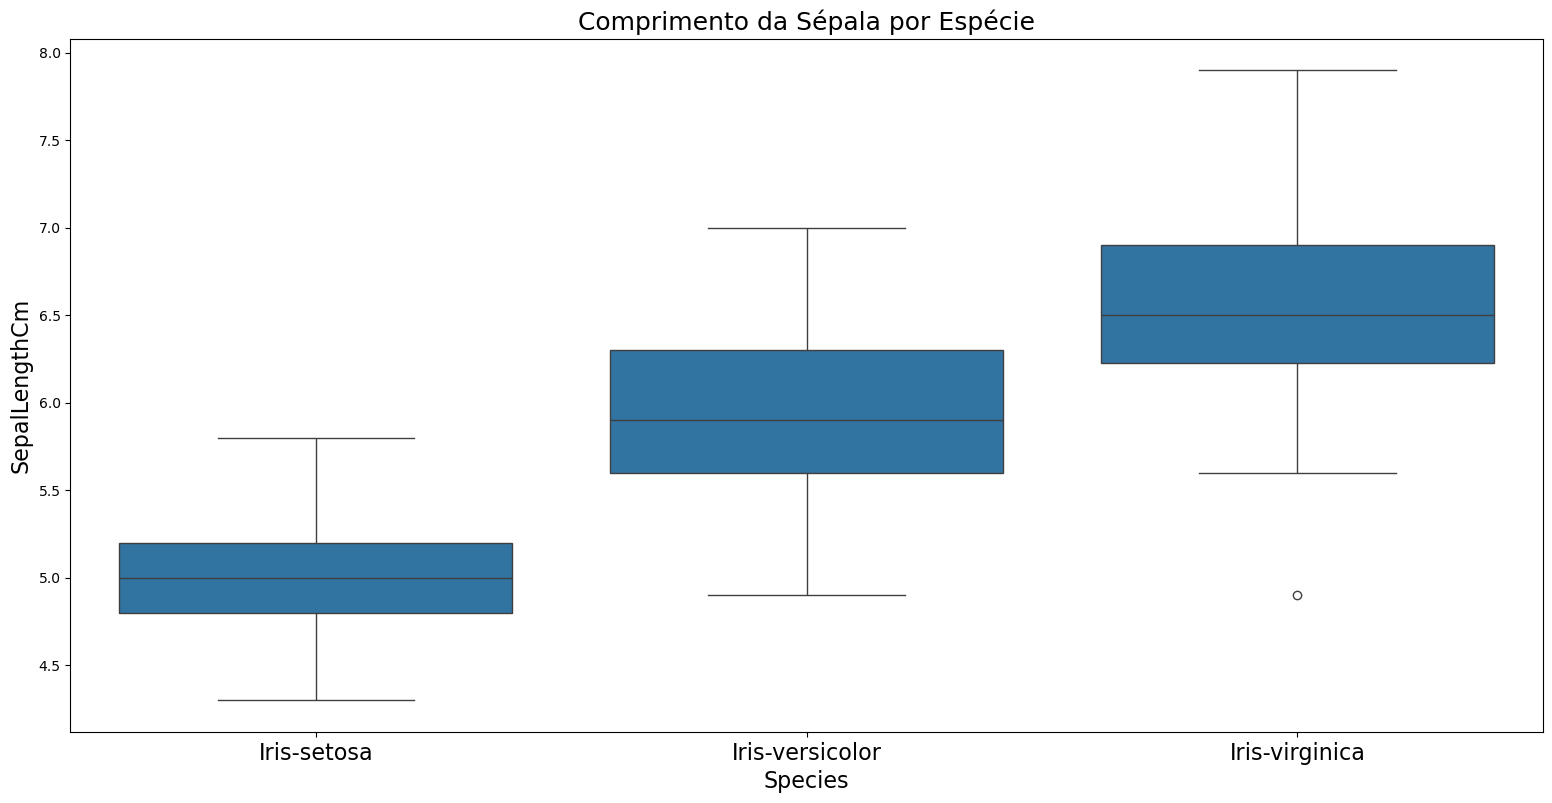

In [99]:
plt.figure(figsize=(19, 9))  # Largura = 19, Altura = 9 (em polegadas)
sns.boxplot(data=df, x='Species', y='SepalLengthCm') # monta o gráfico

plt.title("Comprimento da Sépala por Espécie", fontsize=18) #título

plt.grid(False)
plt.xticks(fontsize=16)
plt.xlabel('Species', fontsize=16) 
plt.ylabel('SepalLengthCm', fontsize=16) 
plt.show()

**Comentário da figura:**\
De acordo com o boxplot do comprimento de sépala, a Iris-setosa possui baixa variabilidade (caixa mais estreita) e possui seu comprimento das sépalas menor do que nas outras espécies.\
A iris-virginica possui uma variabilidade maior e tem o comprimentos da sépala maior que a das outras espécie, possui um outlier, ou seja, para esse caso uma amostra com o comprimento bem abaixo do esperado.\
O comprimento das sépalas aumenta progressivamente da setosa → versicolor → virginica.

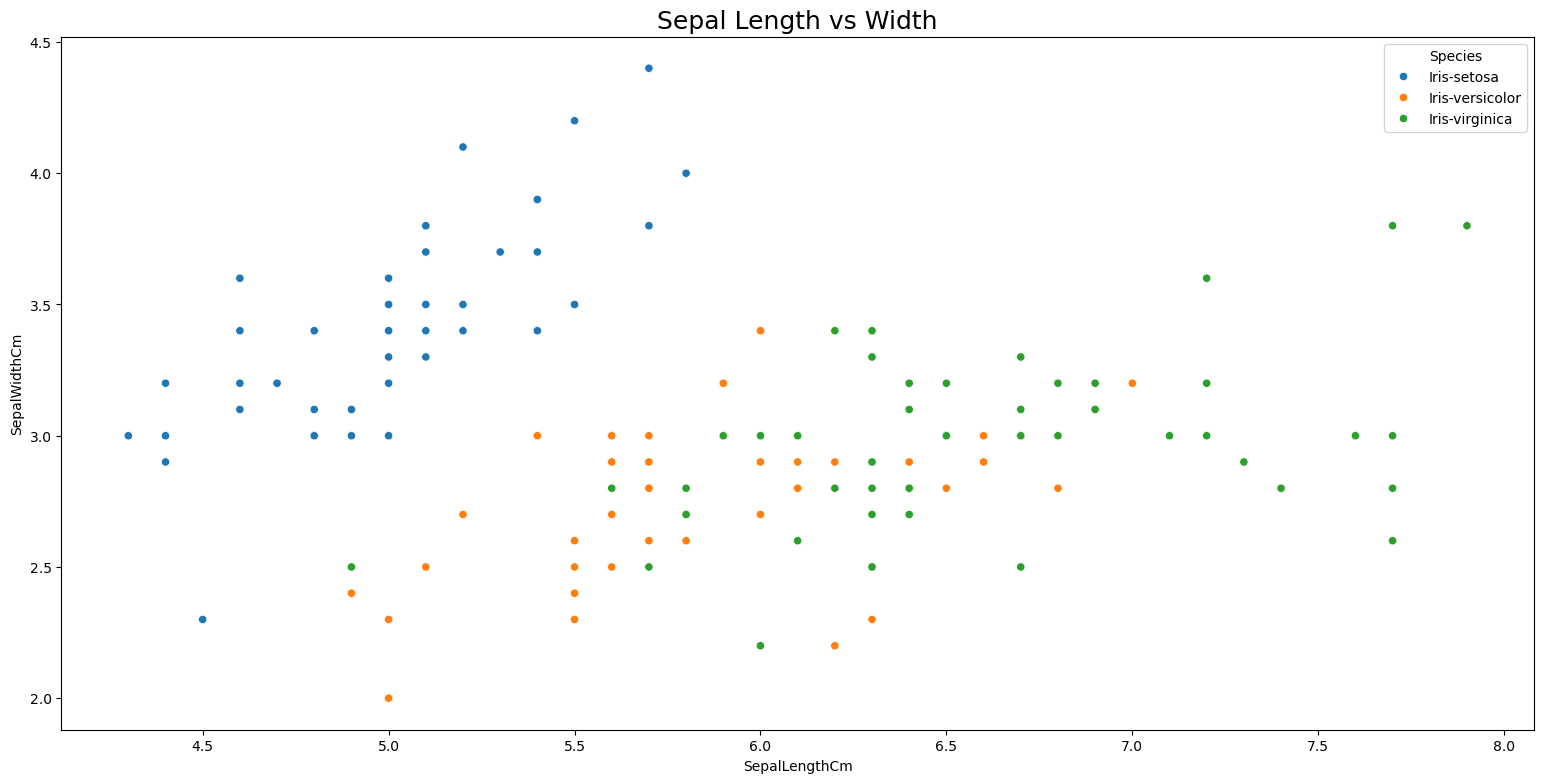

In [101]:
plt.figure(figsize=(19, 9)) 

# Gráfico de dispersão
sns.scatterplot(data=df, x='SepalLengthCm', y='SepalWidthCm', hue='Species')
plt.title("Sepal Length vs Width", fontsize=18)
plt.grid(False)
plt.show()

**Comentário da figura:**\
A Iris-setosa apresenta sépalas mais curtas (menor comprimento) e mais largas (maior largura) do que as outras espécies.\
Versicolor e Virginica apresentam um comportamento semelhante no comprimento e largura da sépala

O sns.pairplot cria uma figura nova internamente e devolve um objeto PairGrid com sua própria figura — então o plt.figure(figsize=...) não afeta essa figura.

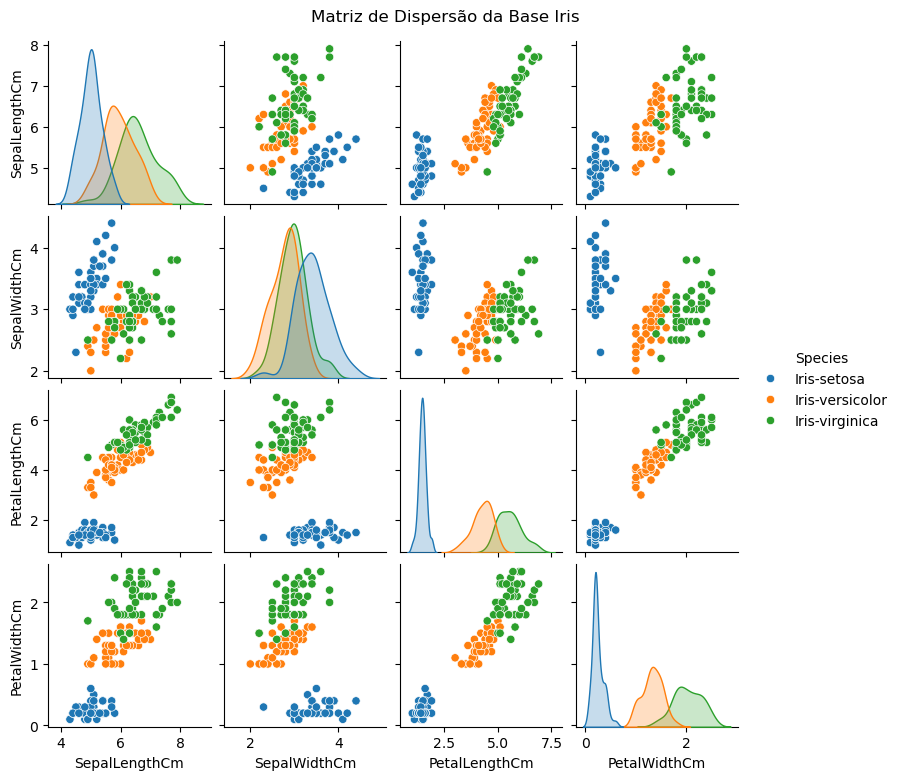

In [105]:
dfMod = df.iloc[:, 1:].copy() # .iloc[linhas,colunas] faz indexação baseada na posição, ou seja, antes da virgula temos linhas e depois temos colunas.

sns.pairplot(dfMod, hue='Species', height=1.9)  # "height" ajusta o tamanho dos gráficos individuais.
plt.suptitle("Matriz de Dispersão da Base Iris", y=1.02) # "y" controla a posição vertical do título da figura.
plt.show()

**Comentário da figura:**\
Cada gráfico na diagonal é a distribuição de uma variável numérica separada por espécie, mostrando a densidade (curva suavizada). Dá para ver que as espécies têm distribuições diferentes para cada variável.

O sns.stripplot é uma função da biblioteca Seaborn que cria um gráfico de dispersão (scatter) para dados categóricos, mostrando a distribuição dos pontos individuais para cada categoria no eixo x.



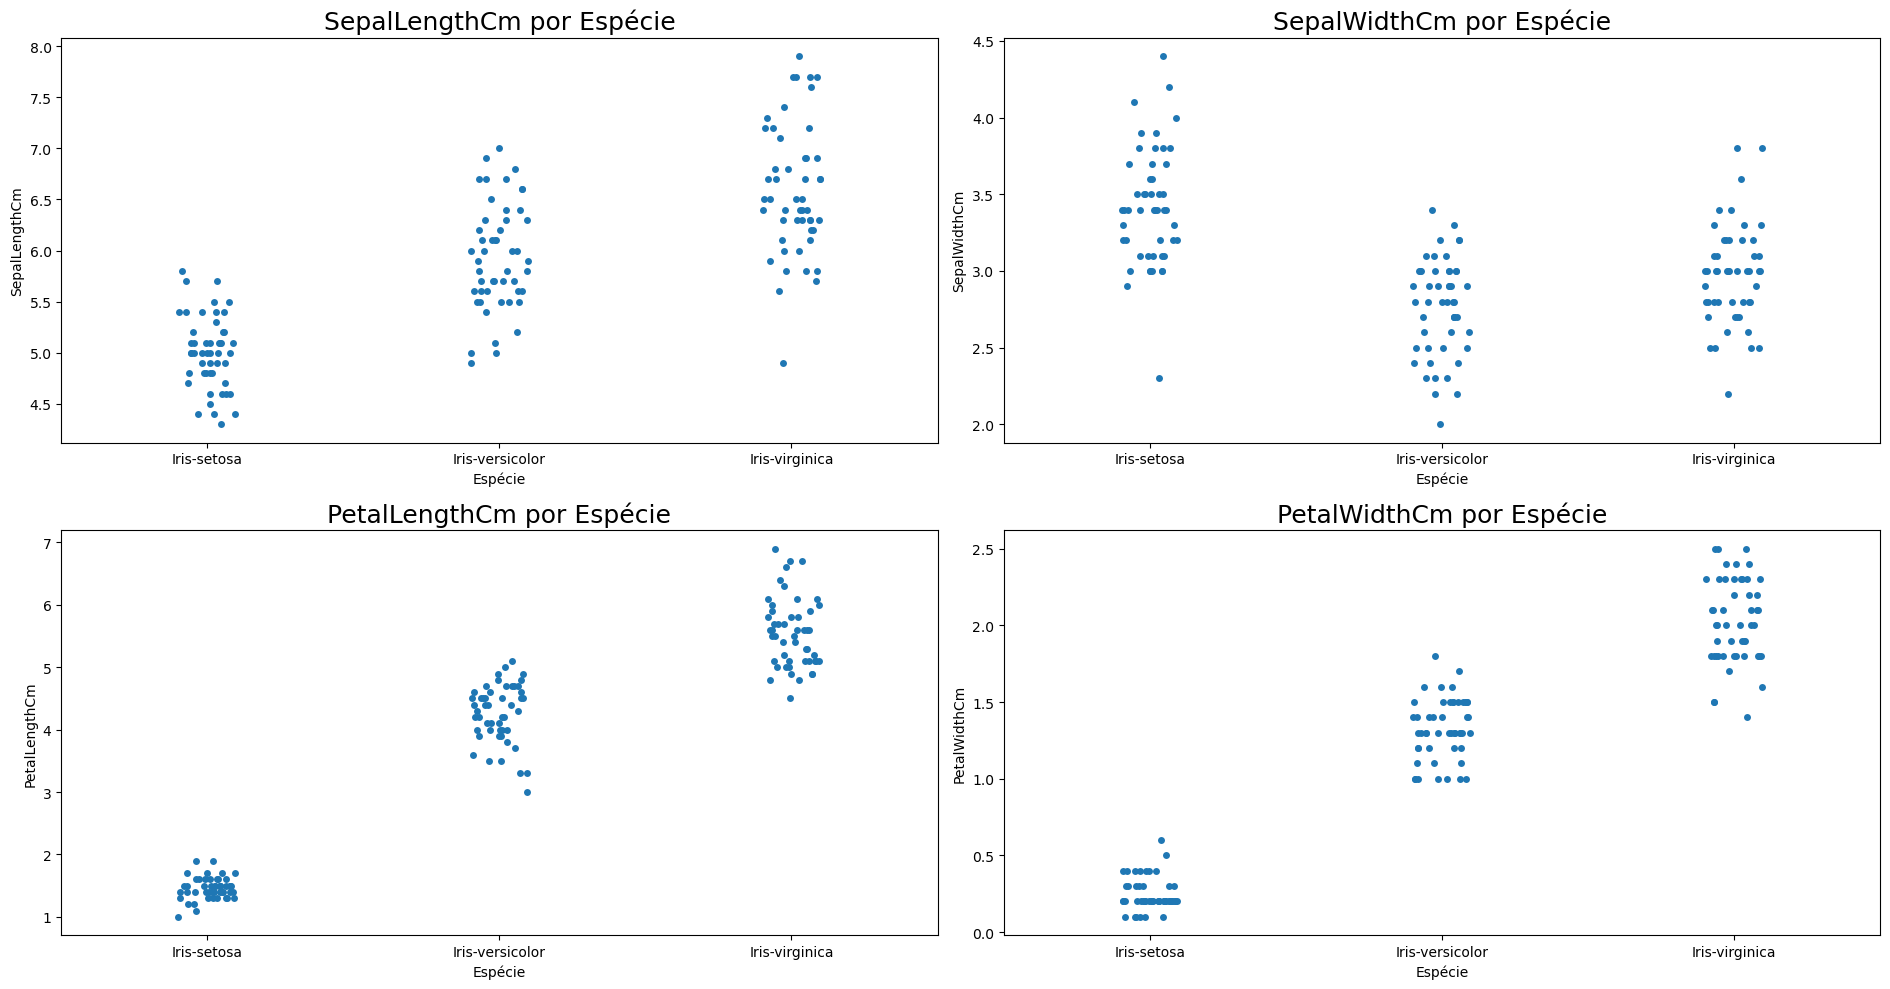

In [109]:
# Define o tamanho da figura
plt.figure(figsize=(19, 10))

# Gráfico 1: SepalLengthCm por espécie
plt.subplot(2, 2, 1) # 2 linhas e 2 colunas
sns.stripplot(data=df, x='Species', y='SepalLengthCm', jitter=True)
plt.title("SepalLengthCm por Espécie", fontsize=18)
plt.xlabel("Espécie")
plt.ylabel("SepalLengthCm")

# Gráfico 2: SepalWidthCm por espécie
plt.subplot(2, 2, 2)
sns.stripplot(data=df, x='Species', y='SepalWidthCm', jitter=True)
plt.title("SepalWidthCm por Espécie", fontsize=18)
plt.xlabel("Espécie")
plt.ylabel("SepalWidthCm")

# Gráfico 3: PetalLengthCm por espécie
plt.subplot(2, 2, 3)
sns.stripplot(data=df, x='Species', y='PetalLengthCm', jitter=True)
plt.title("PetalLengthCm por Espécie", fontsize=18)
plt.xlabel("Espécie")
plt.ylabel("PetalLengthCm")

# Gráfico 4: PetalWidthCm por espécie
plt.subplot(2, 2, 4)
sns.stripplot(data=df, x='Species', y='PetalWidthCm', jitter=True)
plt.title("PetalWidthCm por Espécie", fontsize=18)
plt.xlabel("Espécie")
plt.ylabel("PetalWidthCm")

# Ajusta o espaçamento entre os gráficos
plt.tight_layout()
plt.show()

**Comentário da figura:**\
As variáveis de pétala-Petal (comprimento e largura) são mais informativas para separação das espécies.\
Iris-setosa é claramente distinta das outras duas em todas as variáveis, especialmente nas características da pétala.

**Exercício 3: Crie um painel de gráficos com 4 variáveis do conjunto Iris, utilizando um loop para gerar os subplots automaticamente. Cada gráfico deve mostrar a relação entre a variável e a espécie com sns.stripplot().**

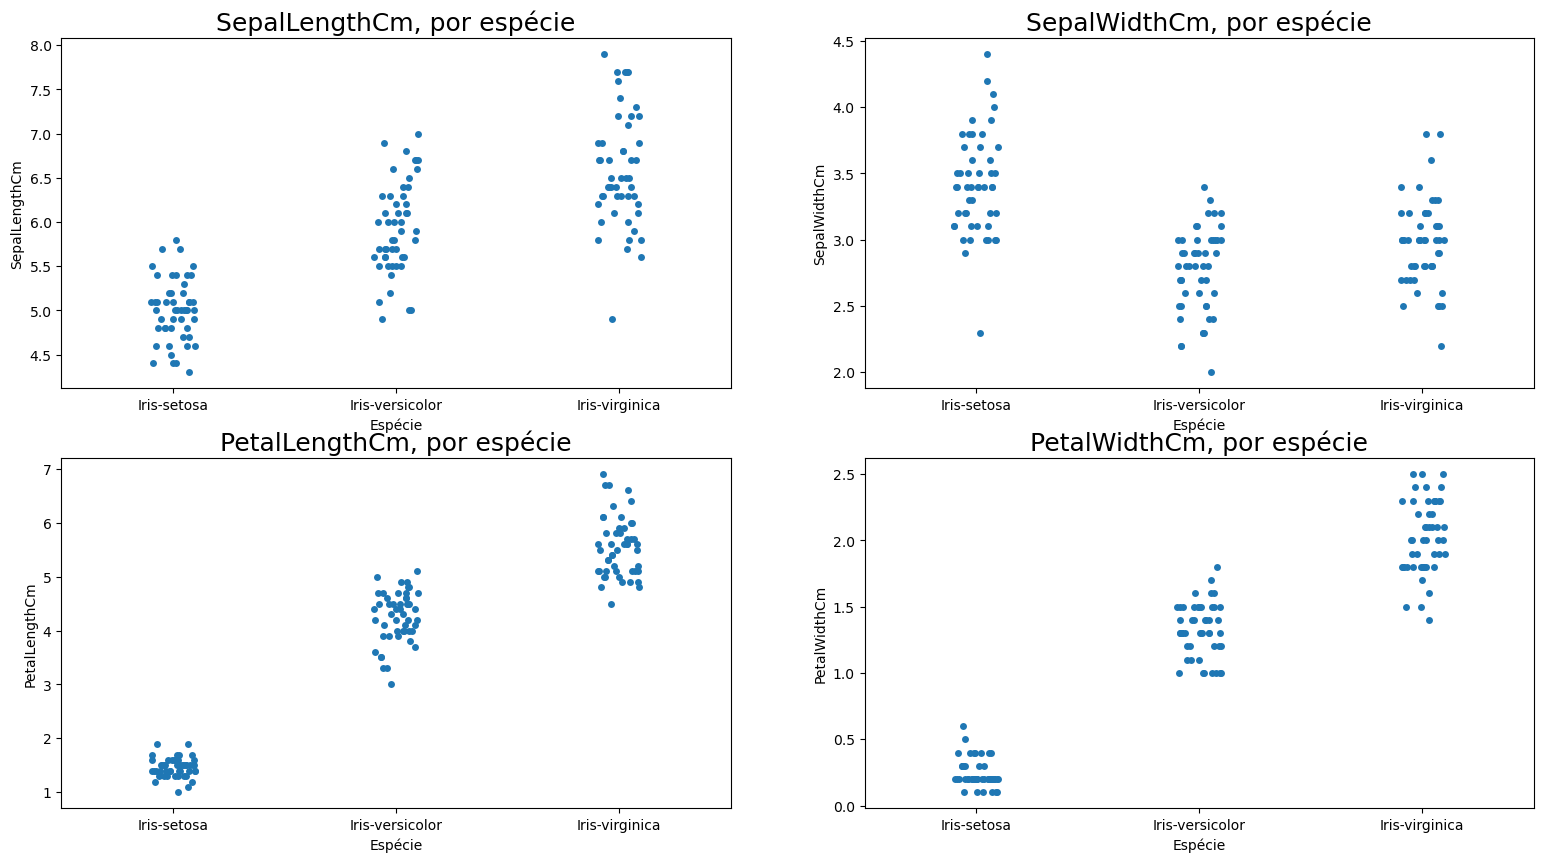

In [112]:
# FORMA 1
plt.figure(figsize = (19,10))

posicaofigura = 1
for coluna in df.iloc[:,1:5]:
    plt.subplot(2,2, posicaofigura) # 2linhas e 2 colunas
    
    sns.stripplot(df, x='Species', y= coluna)
    plt.title(f"{coluna}, por espécie", fontsize = 18)
    plt.xlabel("Espécie")
    plt.ylabel(coluna)
    posicaofigura = posicaofigura+1

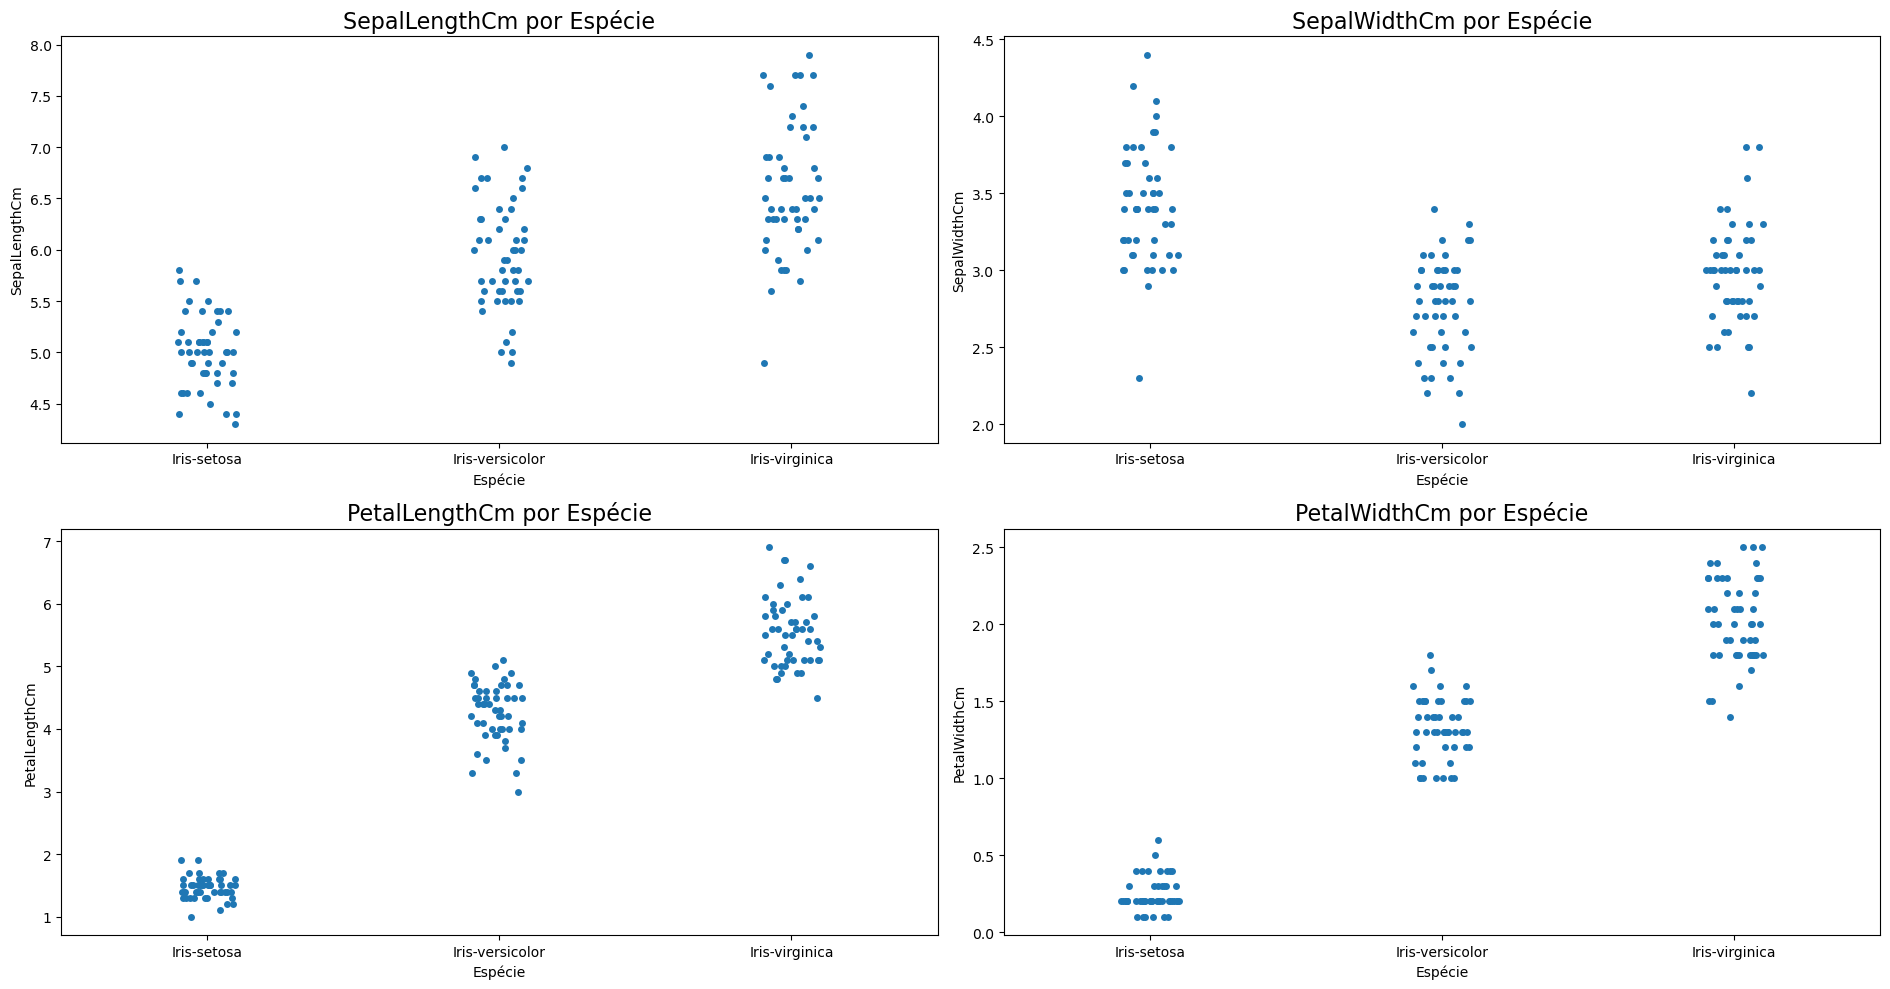

In [113]:
# FORMA 2
variaveis = df.iloc[:,1:5].columns

plt.figure(figsize=(19, 10))
for i, var in enumerate(variaveis, 1): # retorna um iterador que gera pares de valores na forma (i, var), sendo "i" o índice começando de 1 e "var" o valor que correposde esse indice na lista "variáveis"
    plt.subplot(2, 2, i) 
    sns.stripplot(data=df, x='Species', y=var, jitter=True)
    plt.title(f"{var} por Espécie", fontsize=16) # f"{}" é uma forma prática e eficiente de construir strings incluindo expressões dentro delas
    plt.xlabel("Espécie")
    plt.ylabel(var)

plt.tight_layout()
plt.show()

# Simulando dados temporais e manipulando

In [115]:
# Data inicial desejada
data_inicial = pd.to_datetime("2010-01-01")

# Gera datas sequenciais mensais
datas_seq = pd.date_range(start=data_inicial, periods=len(df), freq='ME')

In [123]:
# Coloquei a coluna que criei de data no DataFrame df
df_temporal = df.copy()
df_temporal['data_coleta'] = datas_seq

df_temporal

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,data_coleta
0,1,5.1,3.5,1.4,0.2,Iris-setosa,2010-01-31
1,2,4.9,3.0,1.4,0.2,Iris-setosa,2010-02-28
2,3,4.7,3.2,1.3,0.2,Iris-setosa,2010-03-31
3,4,4.6,3.1,1.5,0.2,Iris-setosa,2010-04-30
4,5,5.0,3.6,1.4,0.2,Iris-setosa,2010-05-31
...,...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica,2022-02-28
146,147,6.3,2.5,5.0,1.9,Iris-virginica,2022-03-31
147,148,6.5,3.0,5.2,2.0,Iris-virginica,2022-04-30
148,149,6.2,3.4,5.4,2.3,Iris-virginica,2022-05-31


In [125]:
# Verificando os tipos de dados de cada coluna
df_temporal.dtypes

Id                        int64
SepalLengthCm           float64
SepalWidthCm            float64
PetalLengthCm           float64
PetalWidthCm            float64
Species                  object
data_coleta      datetime64[ns]
dtype: object

In [129]:
# Extraindo o ano da coluna "data_coleta" e colocando em uma nova coluna "ano"
df_temporal['ano'] = df_temporal['data_coleta'].dt.year
df_temporal.head(3)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,data_coleta,ano
0,1,5.1,3.5,1.4,0.2,Iris-setosa,2010-01-31,2010
1,2,4.9,3.0,1.4,0.2,Iris-setosa,2010-02-28,2010
2,3,4.7,3.2,1.3,0.2,Iris-setosa,2010-03-31,2010


In [135]:
# Extraindo o mes da coluna "data_coleta" e colocando em uma nova coluna "mes"
df['mes'] = df['data_coleta'].dt.month
df.head(3)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,data_coleta,mes
0,1,5.1,3.5,1.4,0.2,Iris-setosa,2010-01-31,1
1,2,4.9,3.0,1.4,0.2,Iris-setosa,2010-02-28,2
2,3,4.7,3.2,1.3,0.2,Iris-setosa,2010-03-31,3


### Reamostragem

Reamostragem é o processo de mudar a frequência de uma série temporal. Você pode:
Reduzir a frequência (ex: de diário para mensal → agregação)
Aumentar a frequência (ex: de mensal para diário → interpolação ou preenchimento)

In [137]:
df_temporal.set_index('data_coleta', inplace=True) #indexando a data

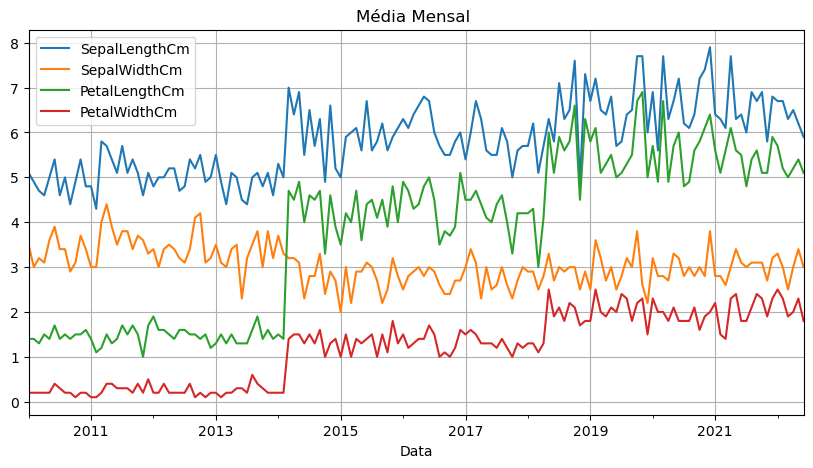

In [163]:
# # Reamostragem para frequência mensal (média do mês)
# Média mensal do comprimento da sépala
media_mensal = df_temporal.iloc[:,1:5].resample('ME').mean()

media_mensal.plot(title="Média Mensal ", figsize=(10, 5))
plt.ylabel("")
plt.xlabel("Data")
plt.grid()
plt.show()

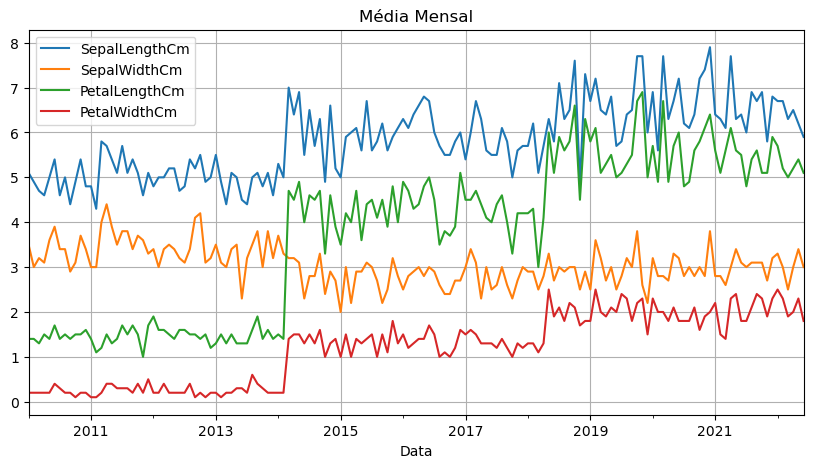

In [165]:
# # Reamostragem para frequência mensal (média do mês)
# Média mensal do comprimento da sépala
media_mensal = df_temporal.iloc[:,1:5].resample('ME').sum()

media_mensal.plot(title="Média Mensal", figsize=(10, 5))
plt.ylabel("")
plt.xlabel("Data")
plt.grid()
plt.show()

### Rolling window

Rolling window é uma técnica que calcula estatísticas (como média, soma, etc.) em janelas deslizantes de tempo.\
Por que usar?\
Para suavizar flutuações (ruído)\
Para observar tendências locais ao longo do tempo\
data.rolling(window=12)\
Cria janelas móveis (rolling windows) de tamanho 12 sobre a série temporal data.\
Isso significa que, para cada ponto da série, ele pega os 12 valores anteriores (incluindo o atual) e cria uma "janela".\

In [193]:
df_temporal.iloc[:,1:2].head(3)

,SepalLengthCm
data_coleta,
2010-01-31,5.1
2010-02-28,4.9
2010-03-31,4.7


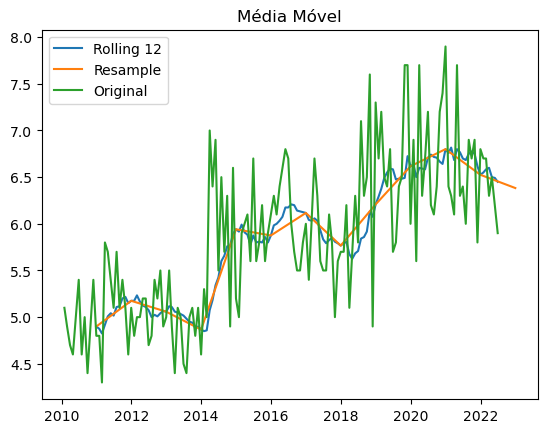

In [203]:
# Reamostragem anual
reamostragem_media_mensal = df_temporal.iloc[:,1:2].resample('YE').mean()
# Rolling window: média móvel de 12 meses
datarolling = df_temporal.iloc[:,1:2].rolling(window=12).mean()
#datarolling = data.rolling(window=13, center=True).mean()

plt.figsize=(10, 4)

plt.plot(datarolling, label='Rolling 12')
plt.plot(reamostragem_media_mensal, label= 'Resample')
plt.plot(df_temporal.iloc[:,1:2], label='Original')
plt.legend()
plt.title('Média Móvel')
plt.show()

# Simulando dados geográficos e manipulando

**Geopandas** é uma biblioteca Python que facilita o trabalho com dados geoespaciais. Ela é tipo uma extensão do pandas, que você já deve conhecer para manipular tabelas, só que com suporte para dados que têm localização no espaço — tipo pontos, linhas e polígonos.

**shapely.geometry** é um módulo dentro da biblioteca Shapely que fornece classes para criar geometrias básicas: pontos, linhas, polígonos, etc.

In [346]:
import numpy as np
import geopandas as gpd
from shapely.geometry import Point

# Criar coordenadas fictícias aleatórias
np.random.seed(42)
df['latitude'] = np.random.uniform(-23.0, -22.0, size=len(df))   # latitudes próximas do Brasil
df['longitude'] = np.random.uniform(-46.0, -45.0, size=len(df))  # longitudes próximas do Brasil

In [348]:
df.head(3)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,data_coleta,ano,mes,latitude,longitude
0,1,5.1,3.5,1.4,0.2,Iris-setosa,2010-01-31,2010,1,-22.625460,-45.091734
1,2,4.9,3.0,1.4,0.2,Iris-setosa,2010-02-28,2010,2,-22.049286,-45.760438
2,3,4.7,3.2,1.3,0.2,Iris-setosa,2010-03-31,2010,3,-22.268006,-45.855105


In [350]:
# Cria a coluna 'geometry' com objetos geométricos (pontos, linhas, polígonos) usando Shapely.
df['geometry'] = df.apply(lambda row: Point(row['longitude'], row['latitude']), axis=1)

In [352]:
df.head(3)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,data_coleta,ano,mes,latitude,longitude,geometry
0,1,5.1,3.5,1.4,0.2,Iris-setosa,2010-01-31,2010,1,-22.625460,-45.091734,POINT (-45.09173411403334 -22.625459881152636)
1,2,4.9,3.0,1.4,0.2,Iris-setosa,2010-02-28,2010,2,-22.049286,-45.760438,POINT (-45.76043810933303 -22.049285693590083)
2,3,4.7,3.2,1.3,0.2,Iris-setosa,2010-03-31,2010,3,-22.268006,-45.855105,POINT (-45.85510512790878 -22.268006058188593)


A palavra-chave **lambda** em Python serve para criar funções pequenas e anônimas (ou seja, sem nome). \
Essas funções são geralmente usadas para tarefas simples e rápidas — especialmente quando você não quer criar uma função inteira com def.

**apply** é uma função do pandas que serve para aplicar uma função a cada linha ou coluna

Esse trecho de código com lambda serve para criar uma coluna de geometrias do tipo Point, a partir de colunas de latitude e longitude de um DataFrame.\
O método **.apply()** do pandas executa uma função em cada linha (axis=1) ou coluna (axis=0) do DataFrame.\
Para cada linha, ela cria um objeto do tipo Point (importado de shapely.geometry) usando os valores daquela linha nas colunas 'longitude' e 'latitude'.\
O Point representa uma coordenada geográfica, com a ordem (longitude, latitude).

Muitas ferramentas de análise geográfica (como o GeoPandas) esperam que os dados geográficos estejam na forma de uma coluna chamada 'geometry' com objetos geométricos.

latitude e longitude são coordenadas geográficas, mas ainda não são objetos geométricos reconhecíveis por bibliotecas como GeoPandas ou Shapely. \
latitude, longitude:	Números (float)\
Point(lon, lat)	Objeto Shapely / GeoPandas

In [354]:
df.dtypes

Id                        int64
SepalLengthCm           float64
SepalWidthCm            float64
PetalLengthCm           float64
PetalWidthCm            float64
Species                  object
data_coleta      datetime64[ns]
ano                       int32
mes                       int32
latitude                float64
longitude               float64
geometry                 object
dtype: object

In [356]:
# Transformar em GeoDataFrame para ter funcionalidades geoespaciais.
df = gpd.GeoDataFrame(df, geometry='geometry')
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,data_coleta,ano,mes,latitude,longitude,geometry
0,1,5.1,3.5,1.4,0.2,Iris-setosa,2010-01-31,2010,1,-22.625460,-45.091734,POINT (-45.09173 -22.62546)
1,2,4.9,3.0,1.4,0.2,Iris-setosa,2010-02-28,2010,2,-22.049286,-45.760438,POINT (-45.76044 -22.04929)
2,3,4.7,3.2,1.3,0.2,Iris-setosa,2010-03-31,2010,3,-22.268006,-45.855105,POINT (-45.85511 -22.26801)
3,4,4.6,3.1,1.5,0.2,Iris-setosa,2010-04-30,2010,4,-22.401342,-45.510547,POINT (-45.51055 -22.40134)
4,5,5.0,3.6,1.4,0.2,Iris-setosa,2010-05-31,2010,5,-22.843981,-45.014350,POINT (-45.01435 -22.84398)
...,...,...,...,...,...,...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica,2022-02-28,2022,2,-22.963113,-45.477757,POINT (-45.47776 -22.96311)
146,147,6.3,2.5,5.0,1.9,Iris-virginica,2022-03-31,2022,3,-22.390436,-45.230006,POINT (-45.23001 -22.39044)
147,148,6.5,3.0,5.2,2.0,Iris-virginica,2022-04-30,2022,4,-22.497321,-45.784179,POINT (-45.78418 -22.49732)
148,149,6.2,3.4,5.4,2.3,Iris-virginica,2022-05-31,2022,5,-22.948521,-45.377110,POINT (-45.37711 -22.94852)


In [358]:
df.dtypes

Id                        int64
SepalLengthCm           float64
SepalWidthCm            float64
PetalLengthCm           float64
PetalWidthCm            float64
Species                  object
data_coleta      datetime64[ns]
ano                       int32
mes                       int32
latitude                float64
longitude               float64
geometry               geometry
dtype: object